### Loading and Saving Data from the github repo as a local file

In [5]:
import pandas as pd
import os
import logging

In [6]:
# logger configuration
logger = logging.getLogger('mycode')
logger.setLevel(logging.DEBUG)

In [7]:
# using logger at a terminal/console level
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)
# formatting the logger
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
# adding log handler
logger.addHandler(console_handler)

In [8]:
def load_data(data_url: str) -> pd.DataFrame:
    """Loading data from a CSV file."""
    try:
        df = pd.read_csv(data_url)
        logger.debug('Data loaded successfully from %s', data_url)
        return df
    except pd.errors.ParserError as e:
        logger.error('Failed to parse the CSV file: %s', e)
        raise
    except Exception as e:
        logger.error('Unexpected error occured while loading the data: %s', e)
        raise

In [9]:
def save_data(df: pd.DataFrame, data_path: str) -> None:
    """Saving csv data to a local folder."""
    try:
        raw_data_path = os.path.join(data_path, 'raw')
        os.makedirs(raw_data_path, exist_ok=True)
        df.to_csv(os.path.join(raw_data_path, "data.csv"), index=False)
        logger.debug('Data successfully saved to %s', raw_data_path)
    except Exception as e:
        logger.error('Unexpected error occur while saving the data: %s', e)
        raise


In [10]:
def main():
    try:
        data_path = "https://raw.githubusercontent.com/JishnudipSaha/Datasets/refs/heads/main/Titanic-Dataset.csv"
        df = load_data(data_url=data_path)
        save_data(df=df, data_path='./data') # this will make a data folder in root
        logger.debug('Data loading and saving successfully completed')
    except Exception as e:
        logger.error('Failed to complete data loading and saving: %s', e)
        print(f"Error: {e}")
        raise
    

if __name__ == '__main__':
    main()

2026-01-26 14:59:43,325 - mycode - DEBUG - Data loaded successfully from https://raw.githubusercontent.com/JishnudipSaha/Datasets/refs/heads/main/Titanic-Dataset.csv
2026-01-26 14:59:43,332 - mycode - DEBUG - Data successfully saved to ./data\raw
2026-01-26 14:59:43,334 - mycode - DEBUG - Data loading and saving successfully completed


In [11]:
data_path = './data/raw/data.csv'
dataFrame = pd.read_csv(data_path)

In [14]:
dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA(Exploratory Data Analysis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = dataFrame

### Visualization

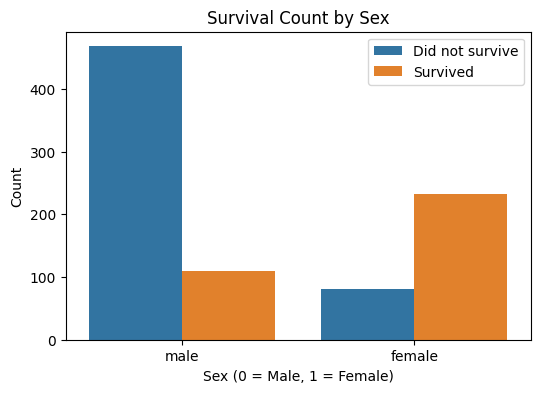

In [ ]:
# Visualize survival count by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

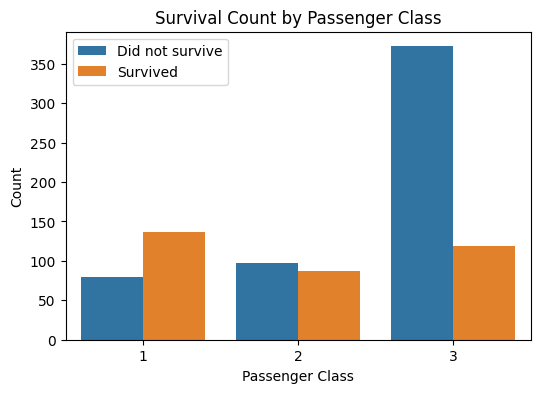

In [14]:
# Visualize survival count by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

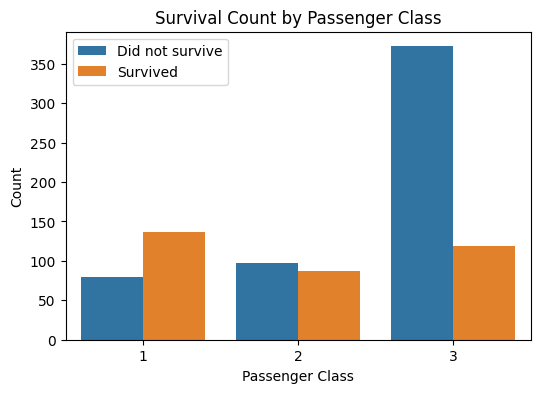

In [15]:
# Visualize survival count by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

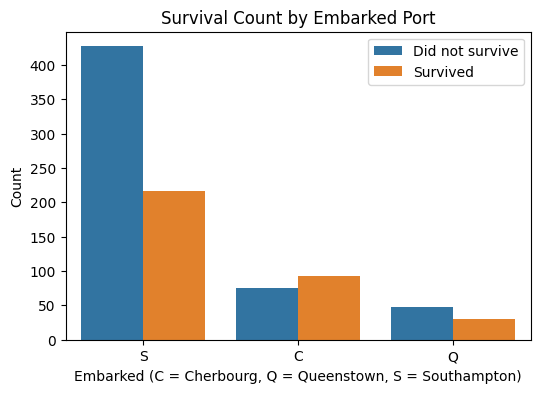

In [16]:
# Visualize survival by Embarked port
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

In [17]:
df['Embarked'].mean

<bound method Series.mean of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

### Feature engineering

In [18]:
# Fill missing values in Age and Embarked columns
# Age: fill with median value
# Embarked: fill with most common value (mode)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\JISHNUDIP\AppData\Local\Temp\ipykernel_4840\3133296326.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [19]:
# Encode categorical variables
# Sex: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# Embarked: one-hot encoding (drop first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True


### Feature selection and model building

In [21]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# 80% training, 20% testing, random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
# max_iter increased to ensure convergence
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Pclass: -0.9380
Sex: 2.5914
Age: -0.0306
SibSp: -0.2952
Parch: -0.1082
Fare: 0.0026
Embarked_Q: -0.1123
Embarked_S: -0.4001


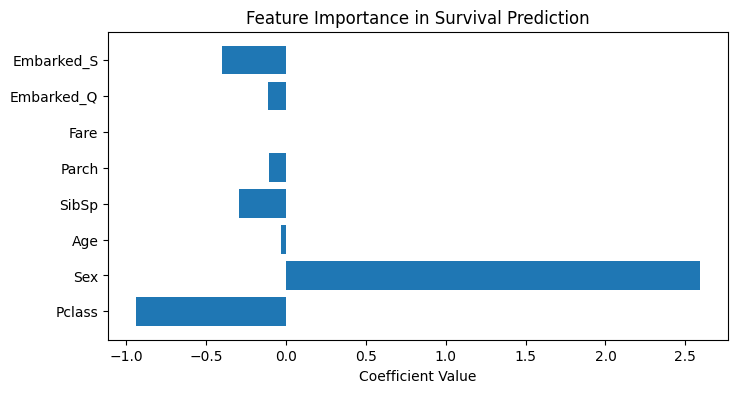

In [25]:
feature_names = X.columns
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f'{name}: {coef:.4f}')

# Optional: visualize feature importance
plt.figure(figsize=(8,4))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Survival Prediction')
plt.show()

### Model evaluation

In [26]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on test set
y_pred = model.predict(X_test)
# Print accuracy, confusion matrix, and classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
# Make predictions for the first 5 passengers in the test set
# 1 = Survived, 0 = Did not survive
print('Predictions for first 5 passengers:', model.predict(X_test.head()))

Predictions for first 5 passengers: [0 0 0 1 1]


In [28]:
# Predict survival for new passenger data entered by the user
# Example input: {'Pclass':3, 'Sex':0, 'Age':22, 'SibSp':1, 'Parch':0, 'Fare':7.25, 'Embarked_Q':0, 'Embarked_S':1}

# Enter new passenger data as a dictionary
new_data = {
    'Pclass': 3,
    'Sex': 1,  # 0 = male, 1 = female
    'Age': 6,
    'SibSp': 0,
    'Parch': 1,
    'Fare': 7.25,
    'Embarked_Q': 0,
    'Embarked_S': 1
}

import pandas as pd
new_df = pd.DataFrame([new_data])
prediction = model.predict(new_df)[0]
if prediction == 1:
    print('Prediction: Survived')
else:
    print('Prediction: Did not survive')

Prediction: Survived


### Exporting model in .pkl file

In [29]:
# Save the trained model as a pickle file for use in the Streamlit app
import pickle
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print('Model saved as titanic_model.pkl')

Model saved as titanic_model.pkl
